<a href="https://colab.research.google.com/github/sanjayi2000/MachineLearning/blob/main/Practice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('/content/practice.csv')


In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

No Null Values are present

In [5]:
df=pd.DataFrame(df)

<ipython-input-6-ad76e9ddb311>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


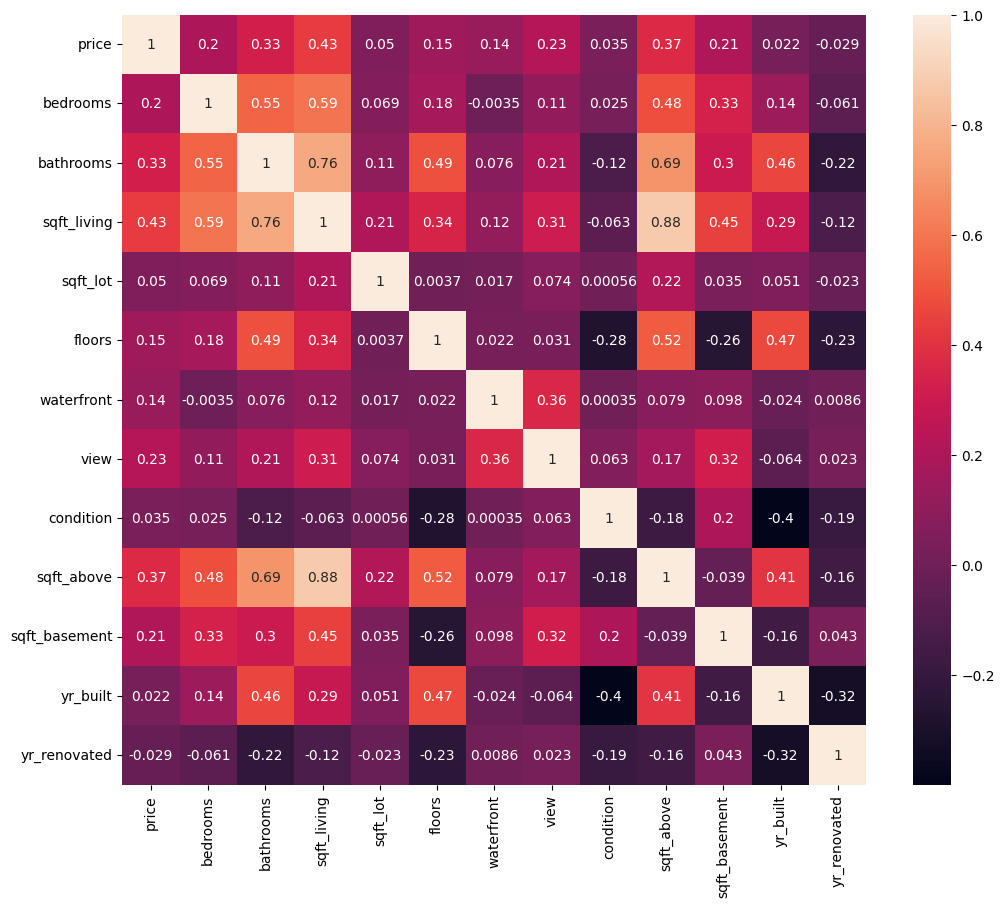

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [7]:
df['country'].nunique()

1

In [8]:
city=df['city'].unique()
df['city'].nunique()
df['street'].nunique()
df['statezip'].nunique()

77

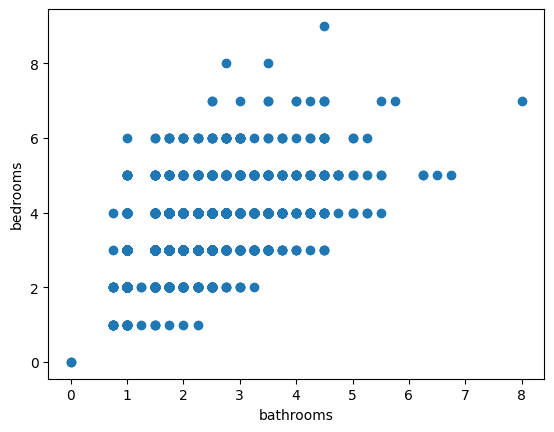

In [9]:
plt.scatter(df['bathrooms'],df['bedrooms'])
plt.xlabel('bathrooms')
plt.ylabel('bedrooms')
plt.show()

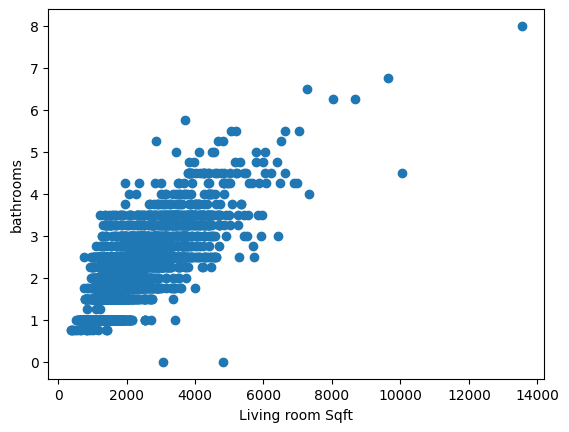

In [10]:
plt.scatter(df['sqft_living'],df['bathrooms'])
plt.xlabel('Living room Sqft')
plt.ylabel('bathrooms')
plt.show()

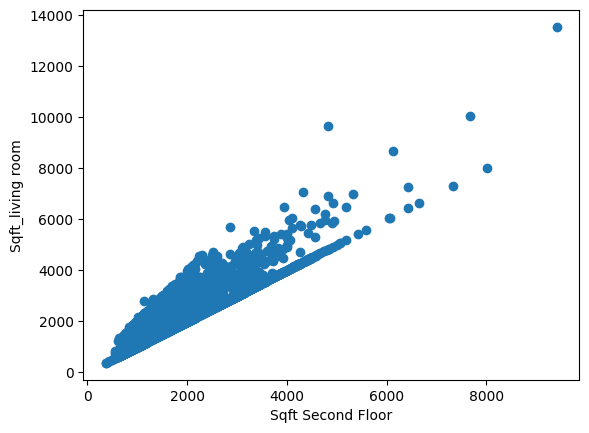

In [11]:
plt.scatter(df['sqft_above'],df['sqft_living'])
plt.xlabel('Sqft Second Floor')
plt.ylabel('Sqft_living room')
plt.show()

In [12]:
df['yr_built'].max()

2014

In [13]:
df['yr_built'].min()


1900

In [14]:
bins=[1900,1920,1940,1960,1980,2000,2020]
labels=['1900-1920','1920-1940','1940-1960','1960-1980','1980-2000','2000+']
df['Yr_built_bins']=pd.cut(df['yr_built'],bins=bins,labels=labels)

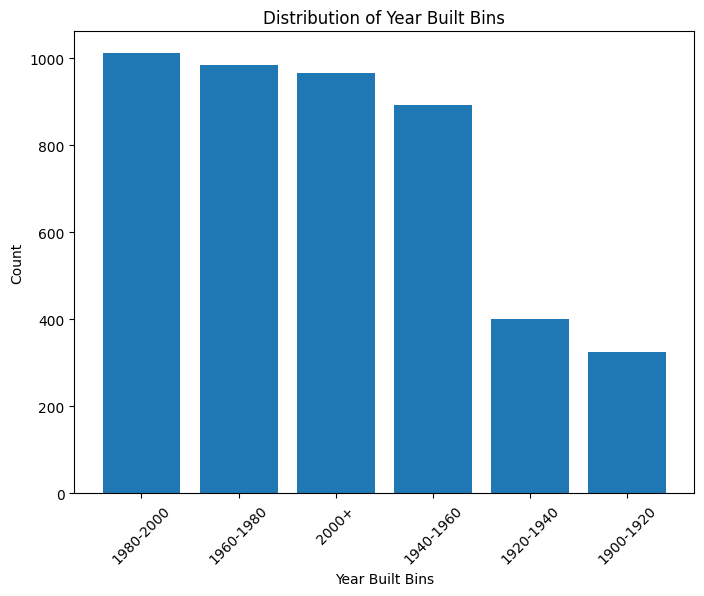

In [15]:
bin_counts = df['Yr_built_bins'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(bin_counts.index, bin_counts.values)
plt.xlabel('Year Built Bins')
plt.ylabel('Count')
plt.title('Distribution of Year Built Bins')
plt.xticks(rotation=45)
plt.show()

In [16]:
bins=[300,1800,3300,4800,6300,7800,9300,10800]
labels=['300-1800','1800-3300','3300-4800','4800-6300','6300-7800','7800-9300','9300+']
df['Sqft_Above_bins']=pd.cut(df['sqft_above'],bins=bins,labels=labels)

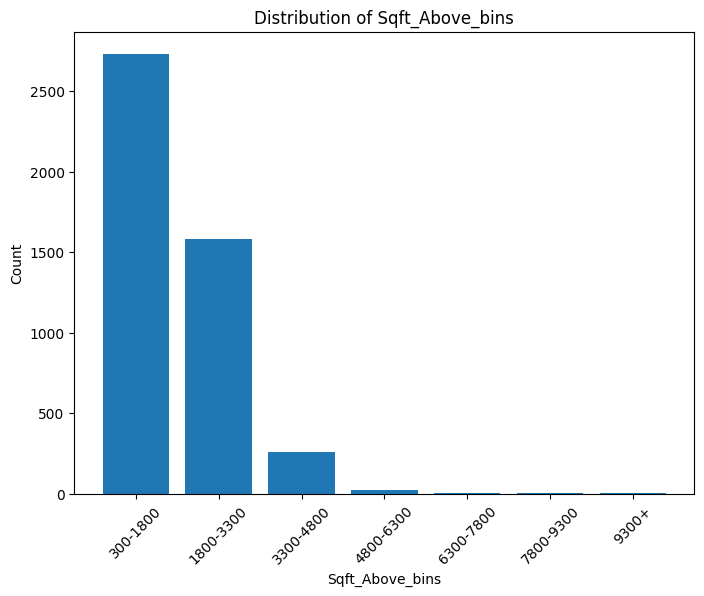

In [17]:
bin_counts = df['Sqft_Above_bins'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(bin_counts.index, bin_counts.values)
plt.xlabel('Sqft_Above_bins')
plt.ylabel('Count')
plt.title('Distribution of Sqft_Above_bins')
plt.xticks(rotation=45)
plt.show()

In [18]:
df.dtypes

date                 object
price               float64
bedrooms              int64
bathrooms           float64
sqft_living           int64
sqft_lot              int64
floors              float64
waterfront            int64
view                  int64
condition             int64
sqft_above            int64
sqft_basement         int64
yr_built              int64
yr_renovated          int64
street               object
city                 object
statezip             object
country              object
Yr_built_bins      category
Sqft_Above_bins    category
dtype: object

In [21]:
scaler = MinMaxScaler()
for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        df[[column]] = scaler.fit_transform(df[[column]])

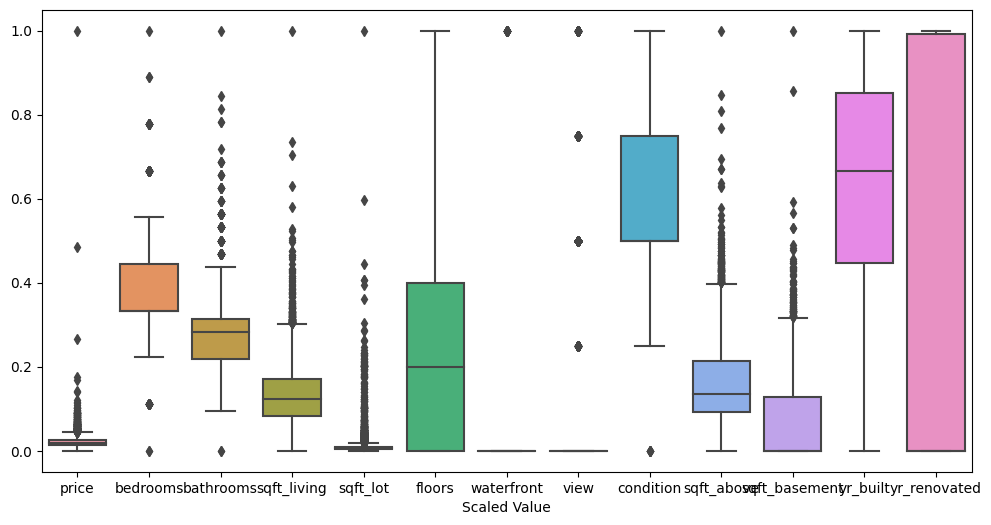

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="v")
plt.xlabel("Scaled Value")
plt.show()


In [24]:
sc=StandardScaler()
for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        df[[column]] = sc.fit_transform(df[[column]])

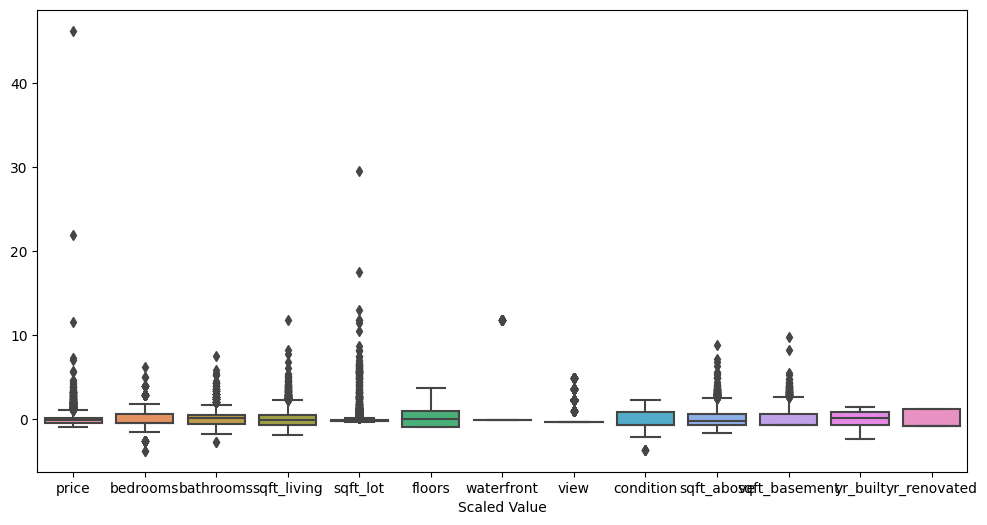

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="v")
plt.xlabel("Scaled Value")
plt.show()